In [1]:
""" 텐서플로 기초 """
import tensorflow as tf

In [2]:
#예제는 모두 https://github.com/hunkim/DeeplearningZerotoAll/

tf.__version__

'1.9.0'

In [3]:
# 값 출력하는 방법 - Session()

hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session() # 텐서플로우는 세션을 통해서 값, 명령등을 수행
print(sess.run(hello))

b'Hello, Tensorflow!'


In [6]:
#텐서플로우는 기본적으로 그래프 틀을 먼저 짜고 그다음에 값을 넣는다고 생각

#일단 값을 먼저 정해놓은 경우
node1 = tf.constant(3.0, tf.float32) # 형식을 같이 지정할 수 있다
node2 = tf.constant(4.0) # 기본 형식은 tf.float32
node3 = tf.add(node1, node2) #노드 더하기

sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2])) #여러개의 노드를 실행할 때 [ ] 로 묶기
print("sess.run(node3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [7]:
#값의 형식을 정해놓고 나중에 값을 입력하는 경우
a = tf.placeholder(tf.float32) #값의 형식만 미리 정해놓기 -> 나중에 feed_dict를 이용해서 값을 입력하게 되
b = tf.placeholder(tf.float32)
adder_node = a + b  # 노드 더하기는 +로 표현가

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


In [8]:
#노드 변경도 쉽게 가능
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))

22.5


In [9]:
""" Linear Regression """
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name="weight") # Variable은 trainable한 값이라고 생각(tf.constant와는 달리 최적화 과정을 통해 변하는 값)
b = tf.Variable(tf.random_normal([1]), name="bias") #tf.random_normal([1])을 통해 1개의 값을 임의로 배정

hypothesis = x_train * W + b # 선형회귀식의 가설

cost = tf.reduce_mean(tf.square(hypothesis - y_train)) #비용함수, MSE를 적용

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) #옵티마이저 설정 - 경사하강법
train = optimizer.minimize(cost) #cost를 minimizing하는 과정을 train 노드에 배치

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #W와 b에 tf.Variable을 사용했으므로 세션 시작 시 이에 대한 초기화를 해줘야함

    for step in range(2001): #2000번 학습
        _, cost_val, W_val, b_val = sess.run([train, cost, W, b]) # train을 run하는 것으로 그래프 상의 모든 값들을 활용한다고 볼 수 있음

        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)


0 19.712336 [-0.22502387] [-1.3703469]
20 0.2416284 [1.1462271] [-0.7280558]
40 0.0593196 [1.2644428] [-0.63881344]
60 0.05242319 [1.2639256] [-0.60355204]
80 0.04759842 [1.2526562] [-0.57468855]
100 0.043229494 [1.2408903] [-0.5476327]
120 0.039261732 [1.2295796] [-0.52189153]
140 0.035658166 [1.2187911] [-0.49736413]
160 0.032385293 [1.208509] [-0.4739898]
180 0.02941285 [1.1987097] [-0.451714]
200 0.026713246 [1.1893712] [-0.4304851]
220 0.02426138 [1.1804714] [-0.41025394]
240 0.022034576 [1.1719899] [-0.39097354]
260 0.020012168 [1.1639073] [-0.37259924]
280 0.018175365 [1.156204] [-0.35508847]
300 0.01650715 [1.1488631] [-0.3384006]
320 0.014992059 [1.1418669] [-0.32249704]
340 0.013616023 [1.1351997] [-0.30734077]
360 0.012366294 [1.1288458] [-0.29289693]
380 0.011231276 [1.1227907] [-0.27913183]
400 0.01020042 [1.1170199] [-0.26601374]
420 0.009264182 [1.1115203] [-0.25351205]
440 0.008413866 [1.1062793] [-0.24159786]
460 0.0076416284 [1.1012847] [-0.23024371]
480 0.0069402386 

In [10]:
# placeholder를 사용하는 경우
X = tf.placeholder(tf.float32, shape=[None]) 
Y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run(
            [train, cost, W, b], feed_dict={X: [1, 2, 3], Y: [1, 2, 3]}
        ) #feed_dict를 통해 값 넣어주기
        if step % 20 == 0:
            print(step, cost_val, W_val, b_val)

    #예측값
    print(sess.run(hypothesis, feed_dict={X: [5]}))
    print(sess.run(hypothesis, feed_dict={X: [2.5]}))
    print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

0 28.305643 [-0.73439175] [-1.044567]
20 0.2638547 [0.92388463] [-0.30185398]
40 0.008945569 [1.0776002] [-0.22162177]
60 0.0060328804 [1.0882496] [-0.2049175]
80 0.005460189 [1.0854634] [-0.19468829]
100 0.004958873 [1.0815766] [-0.18548165]
120 0.004503716 [1.0777551] [-0.17675926]
140 0.004090353 [1.074102] [-0.16845174]
160 0.003714925 [1.0706197] [-0.16053513]
180 0.0033739563 [1.0673008] [-0.15299058]
200 0.0030642748 [1.0641379] [-0.14580059]
220 0.0027830238 [1.0611236] [-0.1389485]
240 0.0025275853 [1.058251] [-0.1324183]
260 0.0022955944 [1.0555134] [-0.12619512]
280 0.002084901 [1.0529046] [-0.12026444]
300 0.0018935386 [1.0504181] [-0.11461245]
320 0.0017197421 [1.0480487] [-0.10922606]
340 0.0015618963 [1.0457906] [-0.10409282]
360 0.001418537 [1.0436387] [-0.09920083]
380 0.0012883387 [1.0415877] [-0.09453881]
400 0.0011700843 [1.0396329] [-0.09009567]
420 0.0010626873 [1.0377706] [-0.08586141]
440 0.000965152 [1.0359955] [-0.08182624]
460 0.0008765636 [1.0343039] [-0.077

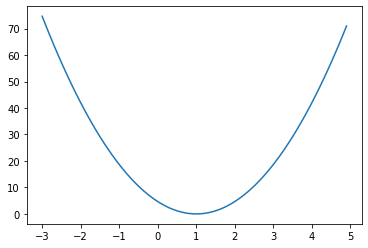

In [11]:
#경사하강법을 직접 구현해보면?

#직접 구현해 보기전 cost function의 형태를 먼저 확인해 보면
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

hypothesis = X * W #hypothesis를 단순화

cost = tf.reduce_mean(tf.square(hypothesis - Y))

W_history = []
cost_history = []

with tf.Session() as sess:
    for i in range(-30, 50):
        curr_W = i * 0.1 #W는 -3부터 5까지 움직이게 됨
        curr_cost = sess.run(cost, feed_dict={W: curr_W})

        W_history.append(curr_W)
        cost_history.append(curr_cost)

# 그래프 그리기
plt.plot(W_history, cost_history)
plt.show()


In [12]:
#경사하강법 직접 구현
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name="weight") # 임의의 값을 직접 넣고 싶으면 W = tf.Variable(5.0) 이런식으로 넣으면 됨

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X) #gradient는 cost function을 미분한 값 ∂(1/2m)∑(WX - Y)^2 / ∂W = (1/m)∑(WX - Y)X
descent = W - learning_rate * gradient # gradient에 학습률을 곱한 한 값을 W에서 뺴주기
update = W.assign(descent) # W := W - a∂C/∂W 의 과정 ; 이 과정을 update란 노드에 배치
# 위의 과정을 단순화 한 것이 train = tf.train.GradientOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(21):
        _, cost_val, W_val = sess.run(
            [update, cost, W], feed_dict={X: x_data, Y: y_data}
        ) #update란 노드를 실행하는 것이 optimizer를 실행하는 것과 같음
        print(step, cost_val, W_val)

0 4.1774526 [0.49539557]
1 1.1882529 [0.73087764]
2 0.33799195 [0.8564681]
3 0.09613996 [0.92344964]
4 0.027346455 [0.95917314]
5 0.007778555 [0.9782257]
6 0.0022125589 [0.98838705]
7 0.00062935107 [0.9938064]
8 0.00017901452 [0.99669677]
9 5.091913e-05 [0.99823827]
10 1.4484183e-05 [0.9990604]
11 4.120025e-06 [0.9994989]
12 1.1717283e-06 [0.99973273]
13 3.3334825e-07 [0.9998575]
14 9.476506e-08 [0.999924]
15 2.6942715e-08 [0.99995947]
16 7.666283e-09 [0.99997836]
17 2.1820636e-09 [0.99998844]
18 6.267413e-10 [0.99999386]
19 1.7515944e-10 [0.9999967]
20 4.976286e-11 [0.9999983]


In [35]:
# Optimizer 활용시 gradient에 대한 조작을 하고 싶으면
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name="weight") # 임의의 값을 직접 넣고 싶으면 W = tf.Variable(5.0) 이런식으로 넣으면 됨

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

gvs = optimizer.compute_gradients(cost,[W])
apply_gradients = optimizer.apply_gradients(gvs)

gradient = tf.reduce_mean((W*X - Y)*X)*2

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(21):
        print(step, sess.run([gradient,W, gvs])) # 직접 계산한 gradient와 optimizer를 사용했을 때의 gradient가 같은지 확인
        sess.run(apply_gradients)

0 [-11.815764, array([-0.2659747], dtype=float32), [(array([-11.815763], dtype=float32), array([-0.2659747], dtype=float32))]]
1 [-0.7877178, array([0.9156017], dtype=float32), [(array([-0.7877179], dtype=float32), array([0.9156017], dtype=float32))]]
2 [-0.052514315, array([0.99437344], dtype=float32), [(array([-0.05251431], dtype=float32), array([0.99437344], dtype=float32))]]
3 [-0.0035011768, array([0.99962485], dtype=float32), [(array([-0.00350118], dtype=float32), array([0.99962485], dtype=float32))]]
4 [-0.00023365021, array([0.99997497], dtype=float32), [(array([-0.00023365], dtype=float32), array([0.99997497], dtype=float32))]]
5 [-1.5576681e-05, array([0.99999833], dtype=float32), [(array([-1.5576681e-05], dtype=float32), array([0.99999833], dtype=float32))]]
6 [-1.3510386e-06, array([0.9999999], dtype=float32), [(array([-1.3510387e-06], dtype=float32), array([0.9999999], dtype=float32))]]
7 [0.0, array([1.], dtype=float32), [(array([0.], dtype=float32), array([1.], dtype=flo

In [36]:
#Multi-variable regression 다변수회귀

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  6649.789 
Prediction:
 [228.7069  267.66684 266.99042 293.75977 200.36853]
10 Cost:  24.387854 
Prediction:
 [156.68517 181.13481 181.71198 200.89467 134.37372]
20 Cost:  24.213917 
Prediction:
 [156.45006 180.88487 181.4488  200.60905 134.1904 ]
30 Cost:  24.101234 
Prediction:
 [156.43219 180.89597 181.44286 200.60356 134.20615]
40 Cost:  23.989304 
Prediction:
 [156.41504 180.90778 181.43771 200.59894 134.22244]
50 Cost:  23.87786 
Prediction:
 [156.39795 180.91962 181.43259 200.59433 134.23871]
60 Cost:  23.76698 
Prediction:
 [156.38089 180.9314  181.42749 200.58972 134.25494]
70 Cost:  23.65675 
Prediction:
 [156.36389 180.94315 181.4224  200.58514 134.27113]
80 Cost:  23.547058 
Prediction:
 [156.34692 180.95488 181.41731 200.58055 134.28726]
90 Cost:  23.437986 
Prediction:
 [156.33    180.96654 181.41223 200.57597 134.30336]
100 Cost:  23.3295 
Prediction:
 [156.31316 180.97823 181.40721 200.57144 134.31943]
110 Cost:  23.221567 
Prediction:
 [156.29633 180.98984 181.

 [154.9849  181.8968  181.01045 200.20486 135.59203]
1000 Cost:  15.593515 
Prediction:
 [154.97179 181.9059  181.00656 200.20117 135.60472]
1010 Cost:  15.526629 
Prediction:
 [154.95868 181.91498 181.00267 200.19746 135.61737]
1020 Cost:  15.460217 
Prediction:
 [154.94563 181.92401 180.99878 200.19379 135.62997]
1030 Cost:  15.394046 
Prediction:
 [154.9326  181.93303 180.99489 200.19008 135.64255]
1040 Cost:  15.328229 
Prediction:
 [154.9196  181.94203 180.99103 200.18642 135.6551 ]
1050 Cost:  15.262744 
Prediction:
 [154.90665 181.951   180.98717 200.18272 135.66762]
1060 Cost:  15.197647 
Prediction:
 [154.89374 181.95995 180.98334 200.17908 135.68011]
1070 Cost:  15.132868 
Prediction:
 [154.88086 181.96887 180.9795  200.17542 135.69257]
1080 Cost:  15.068486 
Prediction:
 [154.868   181.97775 180.97568 200.17175 135.70496]
1090 Cost:  15.004419 
Prediction:
 [154.8552  181.98662 180.97186 200.16812 135.71735]
1100 Cost:  14.940659 
Prediction:
 [154.84242 181.99547 180.96806 

In [38]:
# Multi-variable 다변수회귀 - 매트릭스 사용

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3]) # X는 n x 3
Y = tf.placeholder(tf.float32, shape=[None, 1]) # Y는 n x 1

W = tf.Variable(tf.random_normal([3, 1]), name='weight') # W는 3 x 1
b = tf.Variable(tf.random_normal([1]), name='bias') # b는 1x1

hypothesis = tf.matmul(X, W) + b # 행렬곱을 tf.matmul() 함수를 이용해서 계산

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  1513.0605 
Prediction:
 [[186.32188]
 [225.86519]
 [221.60562]
 [241.06027]
 [172.9175 ]]
10 Cost:  0.36904773 
Prediction:
 [[151.91473]
 [184.51285]
 [180.85918]
 [196.68843]
 [141.37668]]
20 Cost:  0.3544977 
Prediction:
 [[151.80931]
 [184.38866]
 [180.7355 ]
 [196.55379]
 [141.28255]]
30 Cost:  0.35379815 
Prediction:
 [[151.8077 ]
 [184.38918]
 [180.73473]
 [196.55298]
 [141.28355]]
40 Cost:  0.35311106 
Prediction:
 [[151.8064 ]
 [184.3901 ]
 [180.73436]
 [196.55261]
 [141.28485]]
50 Cost:  0.3524279 
Prediction:
 [[151.80508]
 [184.39099]
 [180.73398]
 [196.5522 ]
 [141.28613]]
60 Cost:  0.35174352 
Prediction:
 [[151.80376]
 [184.3919 ]
 [180.73358]
 [196.5518 ]
 [141.2874 ]]
70 Cost:  0.35106117 
Prediction:
 [[151.80247]
 [184.3928 ]
 [180.7332 ]
 [196.5514 ]
 [141.28868]]
80 Cost:  0.35038087 
Prediction:
 [[151.80118]
 [184.3937 ]
 [180.73282]
 [196.55103]
 [141.28998]]
90 Cost:  0.34971422 
Prediction:
 [[151.7999 ]
 [184.3946 ]
 [180.73245]
 [196.55064]
 [141.29

890 Cost:  0.30576244 
Prediction:
 [[151.70757]
 [184.4588 ]
 [180.70529]
 [196.52197]
 [141.38315]]
900 Cost:  0.30531627 
Prediction:
 [[151.70654]
 [184.45952]
 [180.705  ]
 [196.52162]
 [141.38419]]
910 Cost:  0.3048802 
Prediction:
 [[151.70552]
 [184.46024]
 [180.7047 ]
 [196.52132]
 [141.38521]]
920 Cost:  0.30443528 
Prediction:
 [[151.7045 ]
 [184.46094]
 [180.70439]
 [196.52097]
 [141.38625]]
930 Cost:  0.30399695 
Prediction:
 [[151.70349]
 [184.46167]
 [180.7041 ]
 [196.52066]
 [141.38728]]
940 Cost:  0.3035682 
Prediction:
 [[151.70247]
 [184.46236]
 [180.7038 ]
 [196.52032]
 [141.38829]]
950 Cost:  0.30313355 
Prediction:
 [[151.70145]
 [184.46306]
 [180.70349]
 [196.51999]
 [141.38931]]
960 Cost:  0.3027067 
Prediction:
 [[151.70044]
 [184.46378]
 [180.70322]
 [196.51967]
 [141.39034]]
970 Cost:  0.30227327 
Prediction:
 [[151.69945]
 [184.46446]
 [180.7029 ]
 [196.51933]
 [141.39134]]
980 Cost:  0.30185503 
Prediction:
 [[151.69844]
 [184.46516]
 [180.70262]
 [196.5190

1800 Cost:  0.2734128 
Prediction:
 [[151.6251 ]
 [184.51636]
 [180.6813 ]
 [196.49455]
 [141.46722]]
1810 Cost:  0.27312967 
Prediction:
 [[151.62431]
 [184.51692]
 [180.68106]
 [196.49428]
 [141.46803]]
1820 Cost:  0.2728539 
Prediction:
 [[151.62354]
 [184.51747]
 [180.68086]
 [196.494  ]
 [141.46887]]
1830 Cost:  0.27257645 
Prediction:
 [[151.62273]
 [184.518  ]
 [180.6806 ]
 [196.49371]
 [141.46967]]
1840 Cost:  0.27230114 
Prediction:
 [[151.62195]
 [184.51855]
 [180.68039]
 [196.49344]
 [141.47049]]
1850 Cost:  0.27202487 
Prediction:
 [[151.62115]
 [184.5191 ]
 [180.68016]
 [196.49315]
 [141.4713 ]]
1860 Cost:  0.27174774 
Prediction:
 [[151.62039]
 [184.51967]
 [180.67993]
 [196.49289]
 [141.4721 ]]
1870 Cost:  0.27148595 
Prediction:
 [[151.6196 ]
 [184.5202 ]
 [180.67972]
 [196.49263]
 [141.47292]]
1880 Cost:  0.27121535 
Prediction:
 [[151.61882]
 [184.52074]
 [180.67949]
 [196.49236]
 [141.47372]]
1890 Cost:  0.2709402 
Prediction:
 [[151.61806]
 [184.5213 ]
 [180.67926]


In [ ]:
#Tensorflow로 파일에서 데이터 읽어오기

import numpy as np
data = np.loadtext('data.csv', delimiter = ',' , dtype = np.float32) # 일단 numpy를 이용해 데이터 일어들이기
#이후 data를 적당히 slice 후 사용

#혹은 여러개의 파일을 queue 형식으로 읽어들이려면
ilename_queue = tf.train.string_input_producer(
    ['data1.csv','data2.csv', ... ], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults) # record_defaluts는 어떤 형식으로 읽어올건지, 지금은 float형식으로 읽어들인다는 뜻

